In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Sun Jun  9 11:36:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = '/content/drive/MyDrive/YOLOv8'
print(HOME)

/content/drive/MyDrive/YOLOv8


In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/201.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KV7yZZQhlmgDjbcs31ct")
project = rf.workspace("robby-mahendra-ugijg").project("smoking-detection-nlmah")
version = project.version(12)
dataset = version.download("yolov8")

/content/drive/MyDrive/YOLOv8/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.28, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to smoking-detection-12 in yolov8:: 100%|██████████| 6326/6326 [00:52<00:00, 120.80it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/YOLOv8/datasets/smoking-detection-12/data.yaml epochs=15 imgsz=800 plots=True

/content/drive/MyDrive/YOLOv8
100% 21.5M/21.5M [00:00<00:00, 139MB/s]
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/YOLOv8/datasets/smoking-detection-12/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fa

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1717829020.4b7fc22167d1.7296.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch695.jpg	weights
P_curve.png					    train_batch696.jpg
PR_curve.png					    train_batch697.jpg


/content/drive/MyDrive/YOLOv8


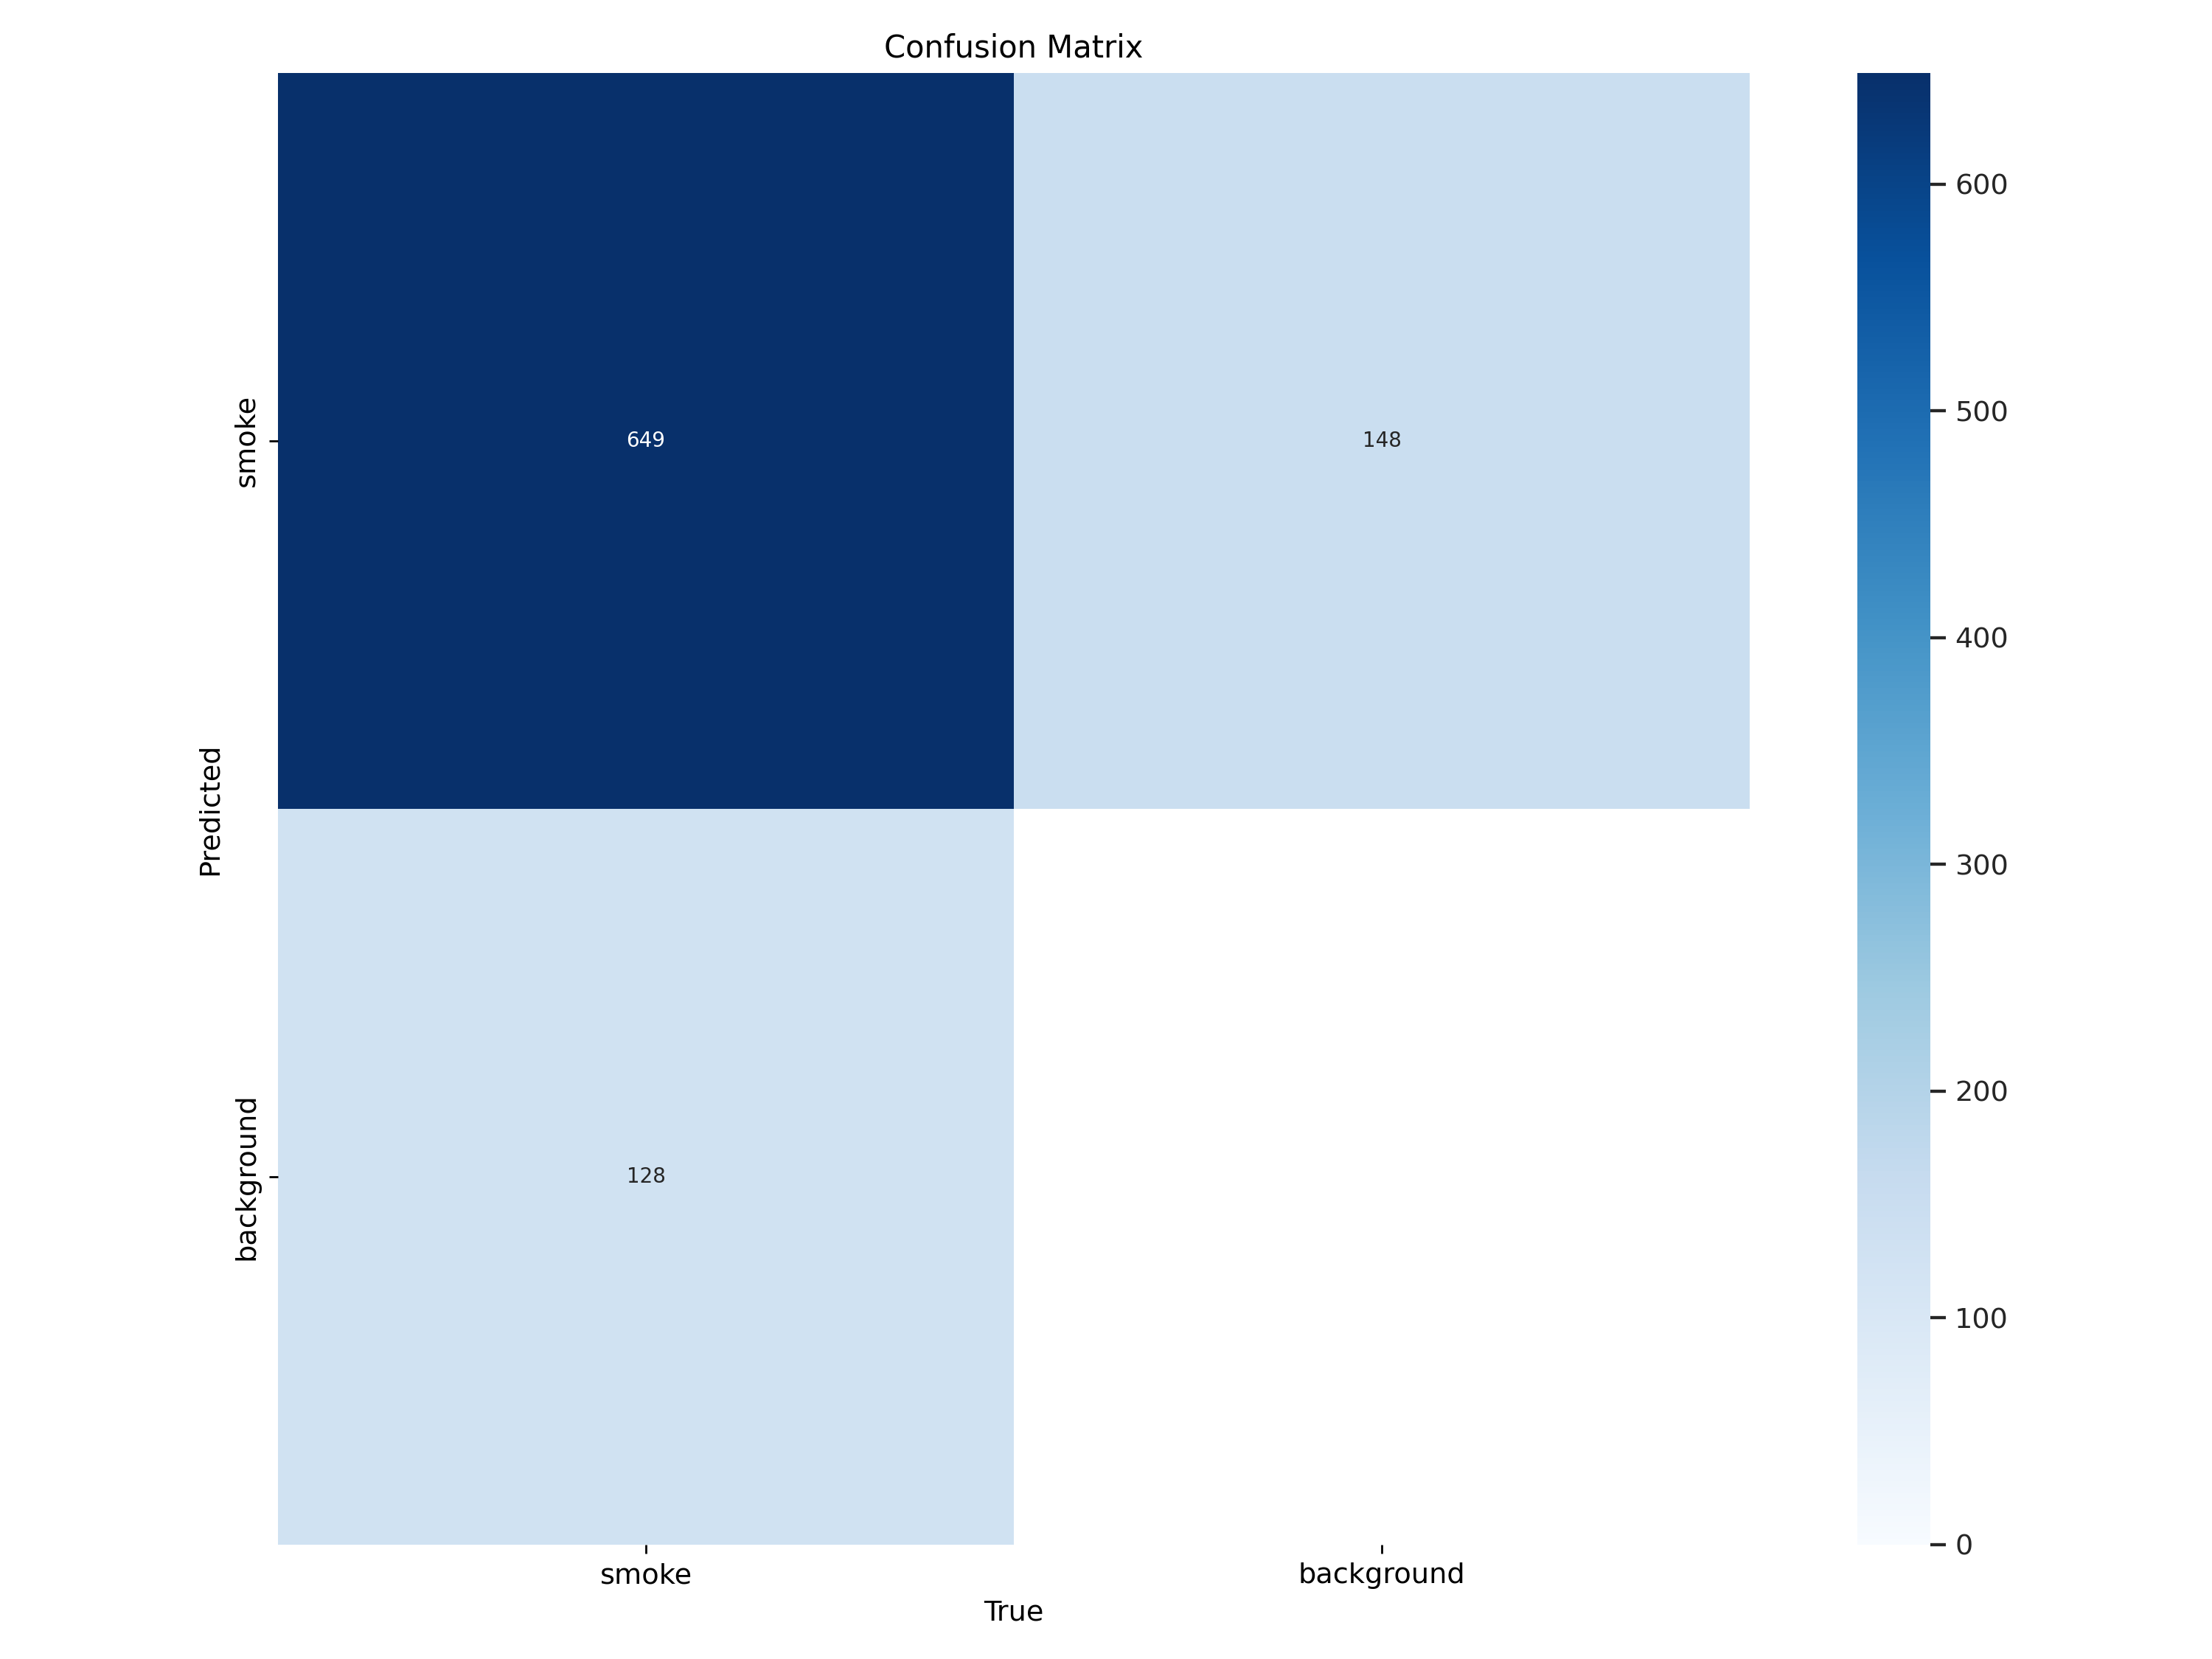

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content/drive/MyDrive/YOLOv8


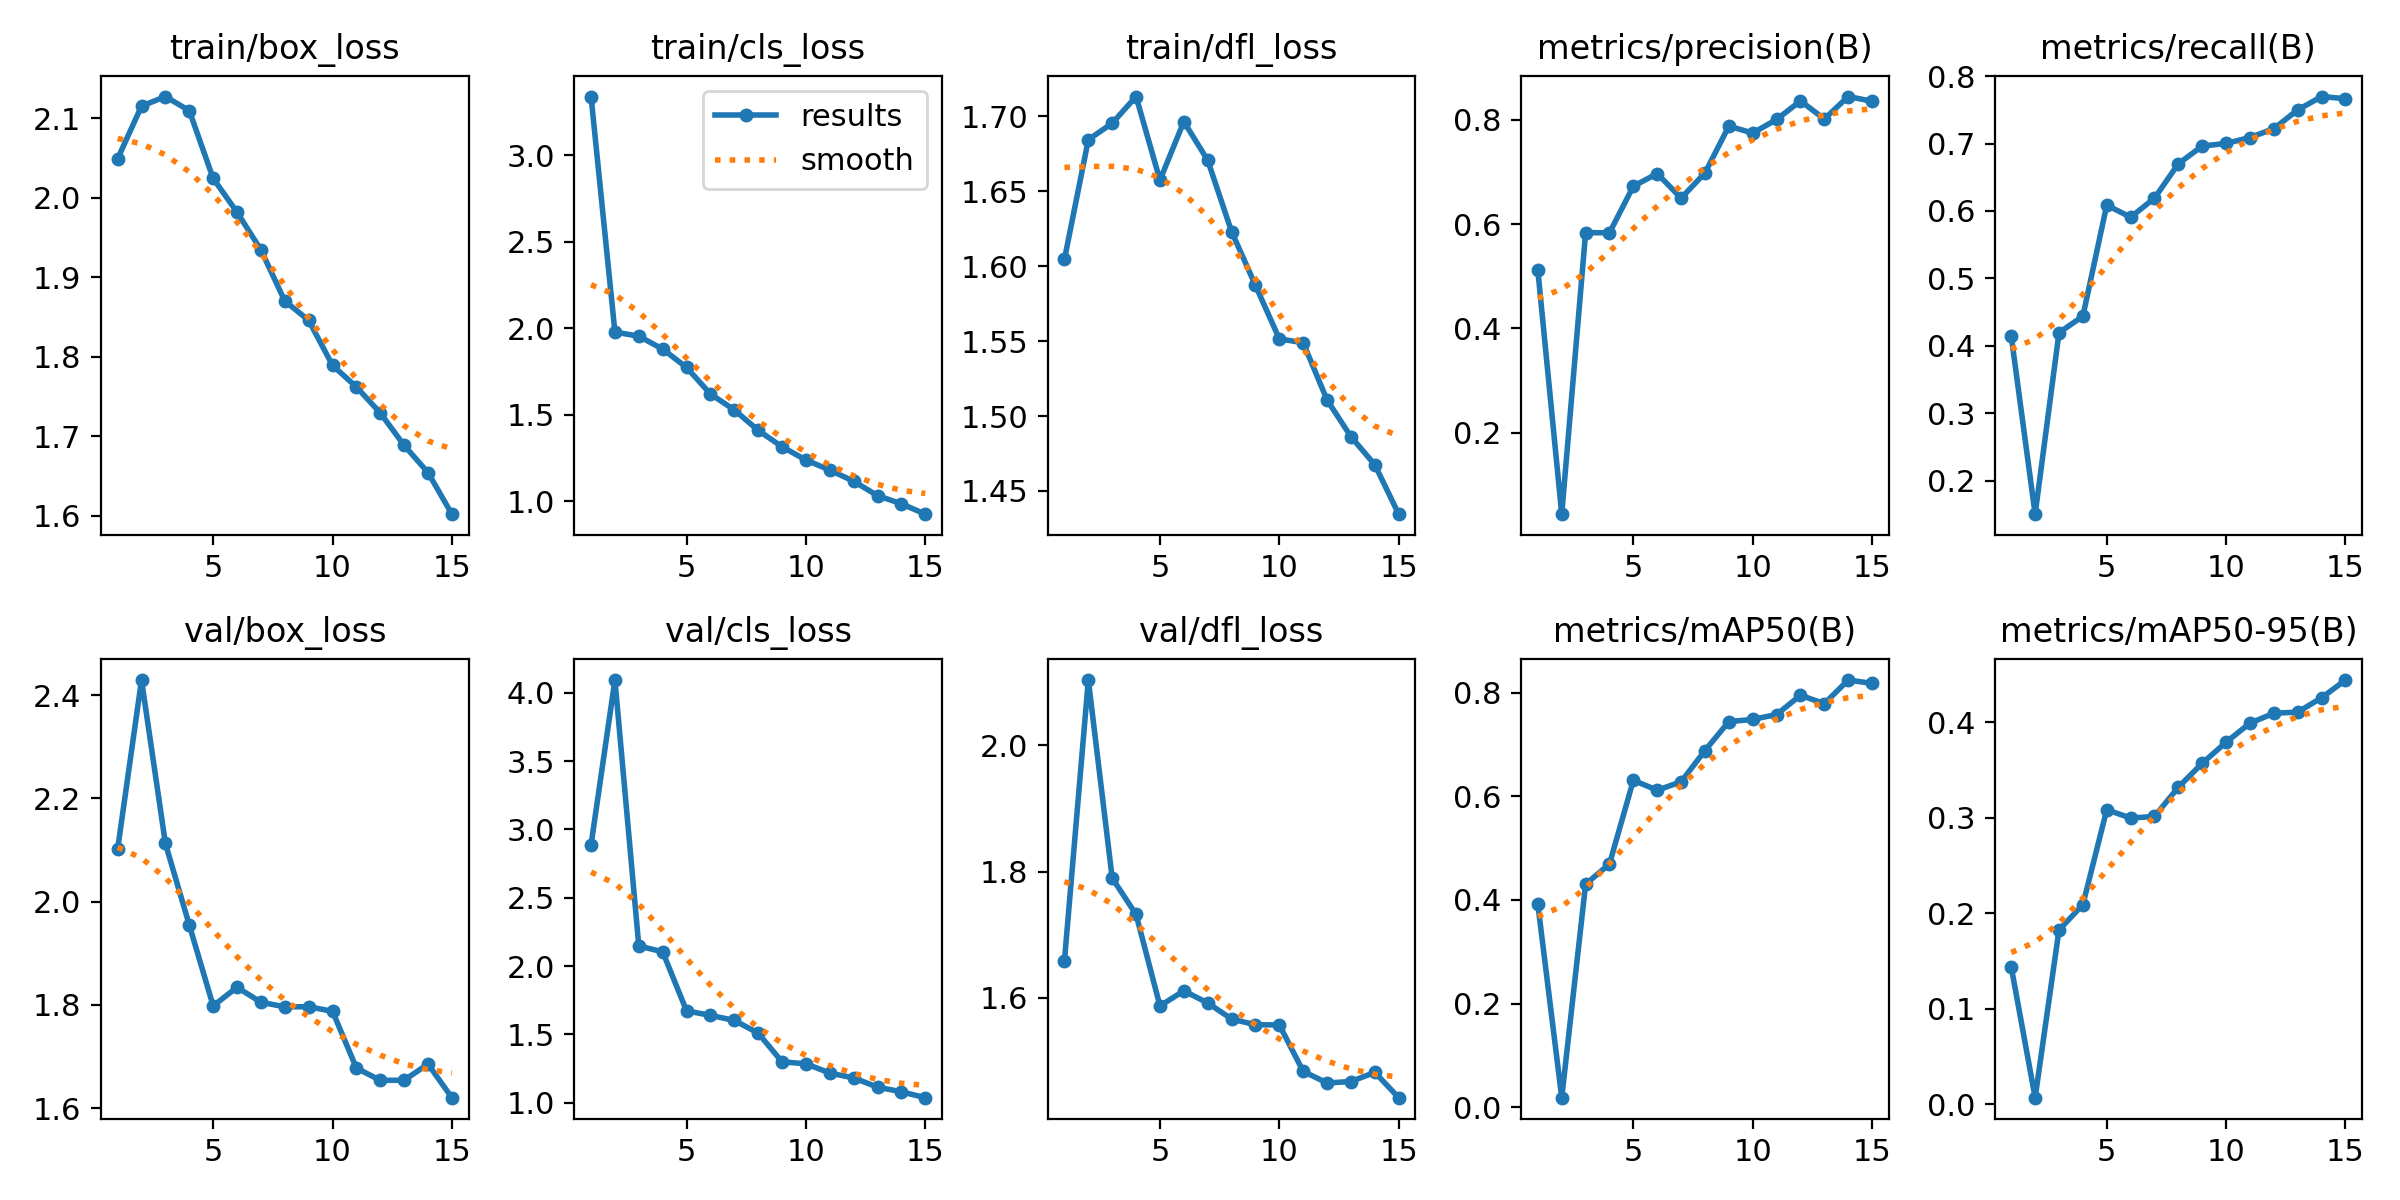

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content/drive/MyDrive/YOLOv8


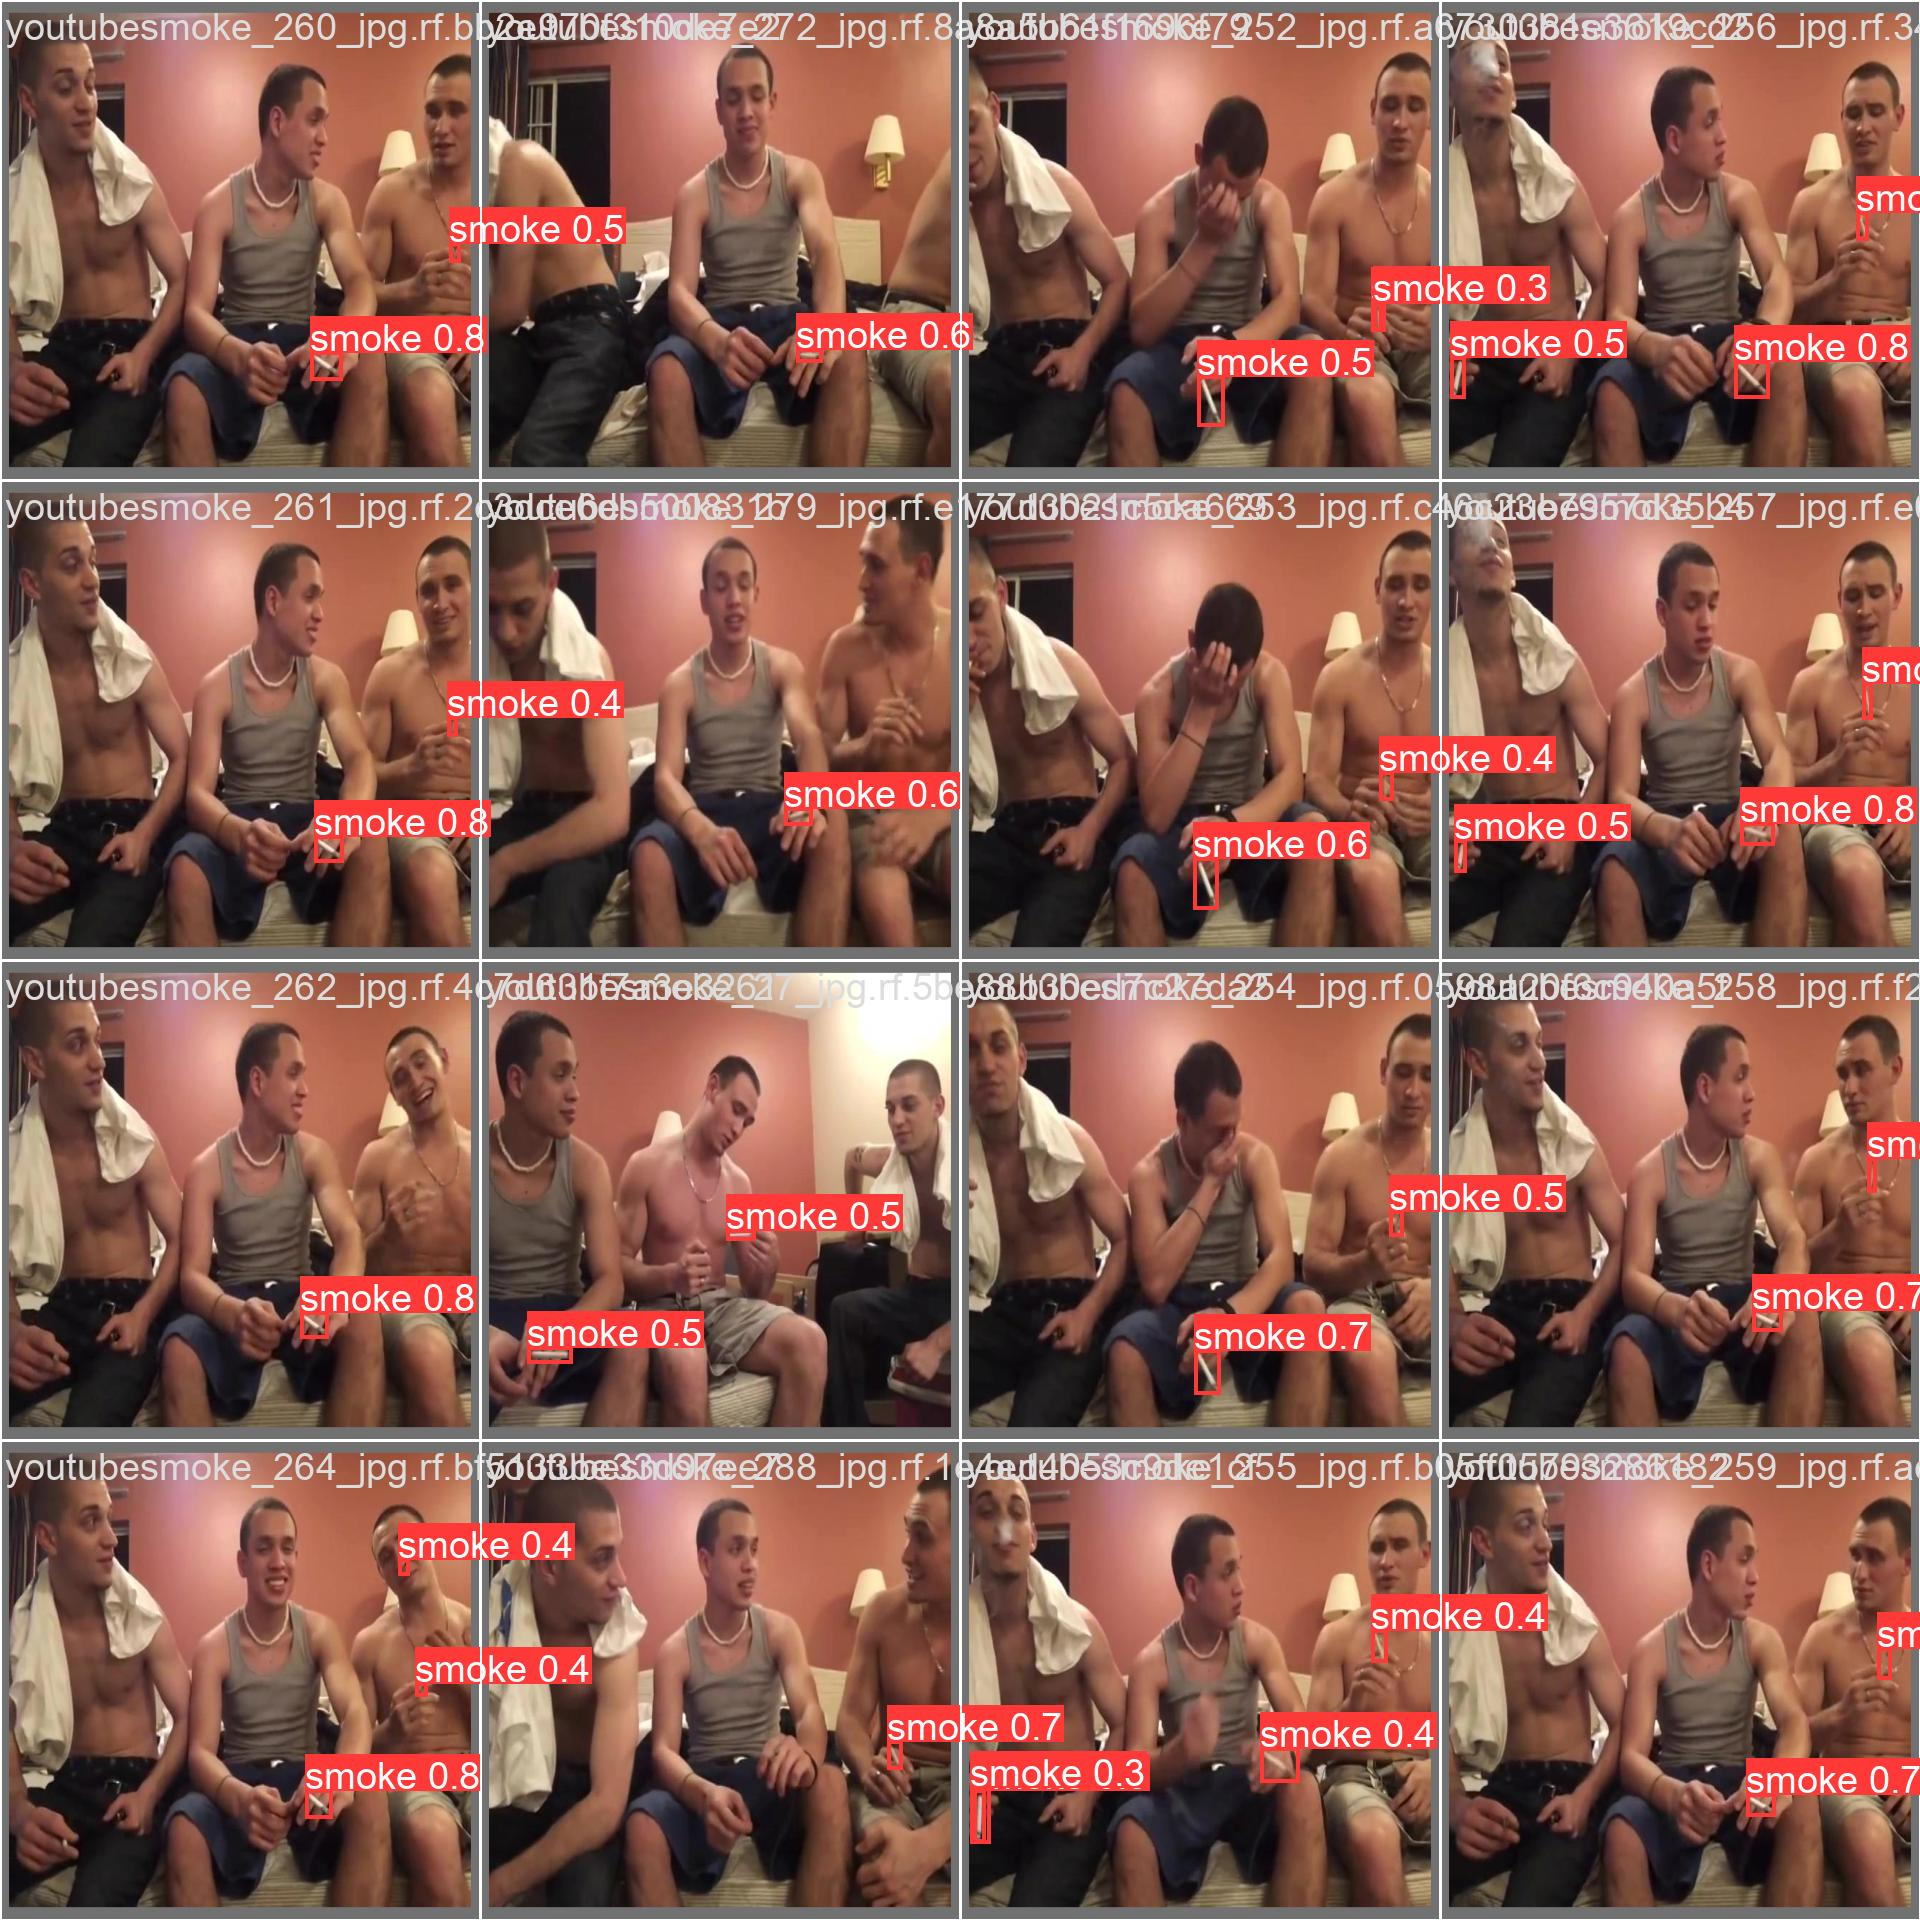

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content/drive/MyDrive/YOLOv8
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/YOLOv8/datasets/smoking-detection-12/valid/labels.cache... 630 images, 0 backgrounds, 0 corrupt: 100% 630/630 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 40/40 [00:20<00:00,  1.92it/s]
                   all        630        777      0.838      0.768      0.821      0.444
Speed: 1.8ms preprocess, 13.9ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content/drive/MyDrive/YOLOv8
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/303 /content/drive/MyDrive/YOLOv8/datasets/smoking-detection-12/test/images/8_jpg.rf.788cf14b9b95c5983eba62bc3c782714.jpg: 800x800 1 smoke, 22.7ms
image 2/303 /content/drive/MyDrive/YOLOv8/datasets/smoking-detection-12/test/images/colored-smoke-malena-morgan-lips-face-wallpaper-thumb_jpg.rf.2c0675f0918a0f89de1a14634732f267.jpg: 800x800 1 smoke, 22.5ms
image 3/303 /content/drive/MyDrive/YOLOv8/datasets/smoking-detection-12/test/images/effects-of-passive20smoking_jpg.rf.5825ab9ab74c207dffee68eef225bdc6.jpg: 800x800 1 smoke, 22.5ms
image 4/303 /content/drive/MyDrive/YOLOv8/datasets/smoking-detection-12/test/images/elderly-man-smoking-a-cigarette-with-an-stock-images_csp24612058_jpg.rf.405c883943b466dde59c65ecffcf0ddf.jpg: 800x800 1 smoke, 26.3ms
image 5/303 /content/drive/MyDrive/YOLOv

**NOTE:** Let's take a look at few results.

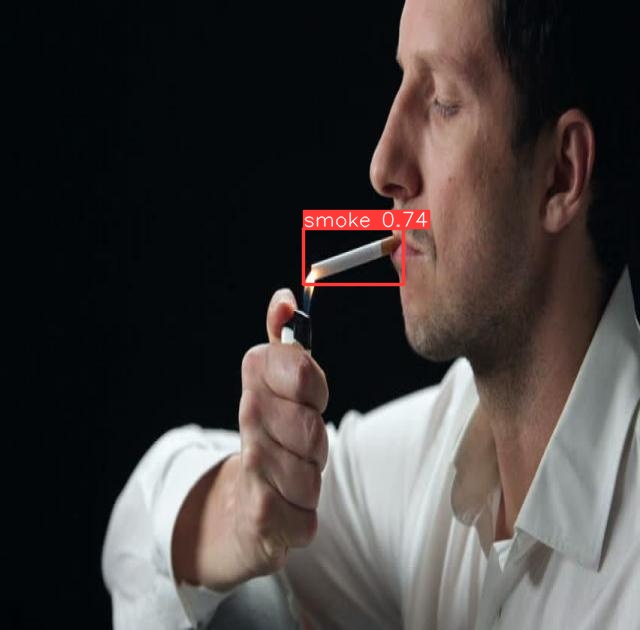

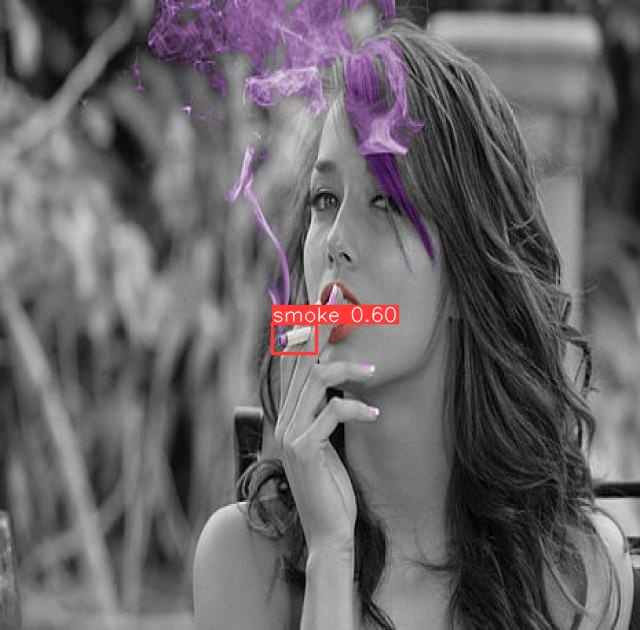

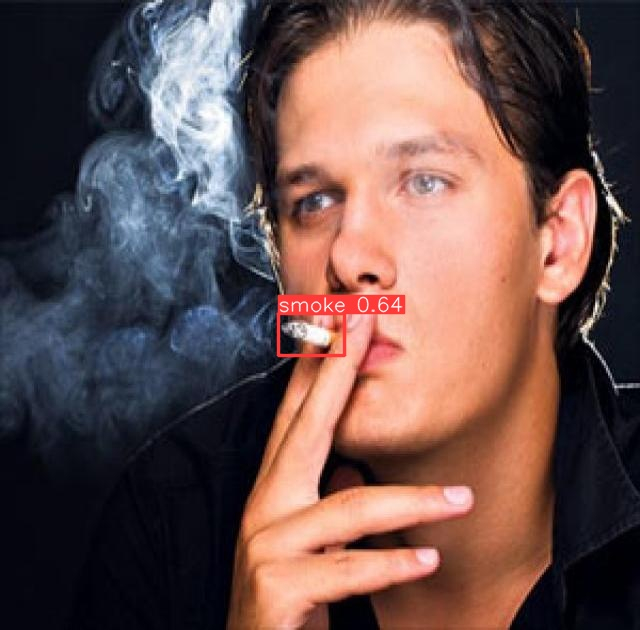

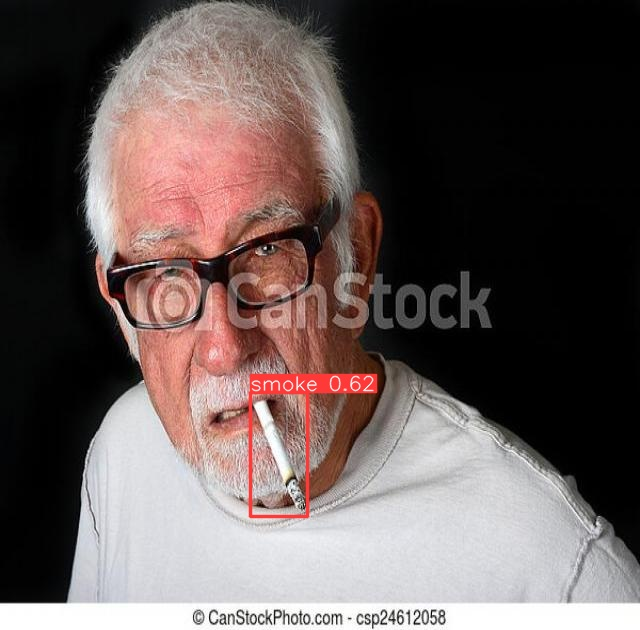

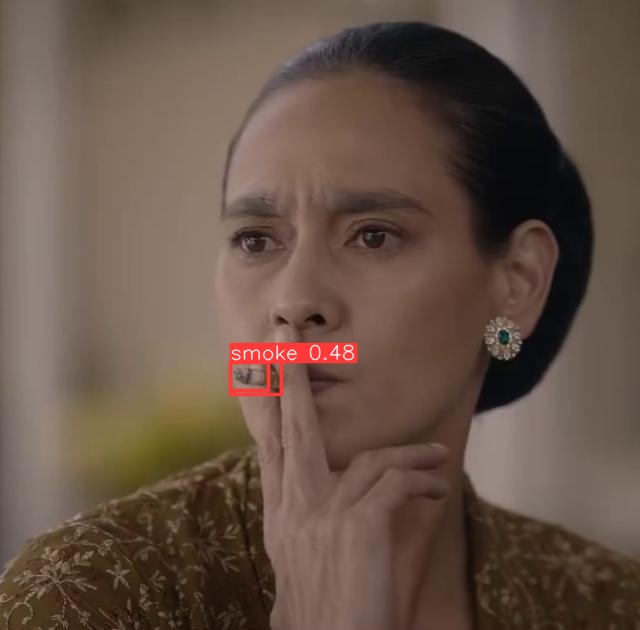

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Further Improve Model

In [ ]:
%cd {HOME}/datasets

rf = Roboflow(api_key="KV7yZZQhlmgDjbcs31ct")
project = rf.workspace("wuhan-university-p0yi1").project("cigcigarette-detection")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.28, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to cigcigarette-detection-1 in yolov8:: 100%|██████████| 4012/4012 [00:33<00:00, 120.17it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=/content/drive/MyDrive/YOLOv8/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/YOLOv8/datasets/cigcigarette-detection-1/data.yaml epochs=25 imgsz=800 plots=True

/content/drive/MyDrive/YOLOv8
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/YOLOv8/runs/detect/train/weights/best.pt, data=/content/drive/MyDrive/YOLOv8/datasets/cigcigarette-detection-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, e

In [ ]:
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KV7yZZQhlmgDjbcs31ct")
project = rf.workspace("wuhan-university-p0yi1").project("cigcigarette-detection")
version = project.version(3)
dataset = version.download("yolov8")


mkdir: cannot create directory ‘/content/drive/MyDrive/YOLOv8/datasets’: File exists
/content/drive/MyDrive/YOLOv8/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.28, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to cigcigarette-detection-3 in yolov8:: 100%|██████████| 9612/9612 [01:27<00:00, 110.46it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=/content/drive/MyDrive/YOLOv8/runs/detect/train2/weights/best.pt data=/content/drive/MyDrive/YOLOv8/datasets/cigcigarette-detection-3/data.yaml epochs=25 imgsz=800 plots=True

/content/drive/MyDrive/YOLOv8
Ultralytics YOLOv8.2.29 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/YOLOv8/runs/detect/train2/weights/best.pt, data=/content/drive/MyDrive/YOLOv8/datasets/cigcigarette-detection-3/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, 

In [ ]:
#Upload method to Roboflow
project.version(2).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train3/")

Dependency ultralytics==8.0.196 is required but found version=8.2.29, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/three-musketeers/cigarette-detection-2ao2c/2
Share your model with the world at: https://universe.roboflow.com/three-musketeers/cigarette-detection-2ao2c/model/2


In [ ]:
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="KV7yZZQhlmgDjbcs31ct")
project = rf.workspace("demo-dbnls").project("smoke-x4vgi")
version = project.version(1)
dataset = version.download("yolov8")


/content/drive/MyDrive/YOLOv8/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.29, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Smoke-1 in yolov8:: 100%|██████████| 17344/17344 [02:25<00:00, 119.47it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=/content/drive/MyDrive/YOLOv8/runs/detect/train3/weights/best.pt data=/content/drive/MyDrive/YOLOv8/datasets/Smoke-1/data.yaml epochs=25 imgsz=800 plots=True

/content/drive/MyDrive/YOLOv8
Ultralytics YOLOv8.2.29 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/YOLOv8/runs/detect/train3/weights/best.pt, data=/content/drive/MyDrive/YOLOv8/datasets/Smoke-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data=/content/drive/MyDrive/YOLOv8/datasets/Smoke-1/data.yaml

/content/drive/MyDrive/YOLOv8
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
100% 755k/755k [00:00<00:00, 28.4MB/s]
val: Scanning /content/drive/MyDrive/YOLOv8/datasets/Smoke-1/valid/labels.cache... 1726 images, 0 backgrounds, 0 corrupt: 100% 1726/1726 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 108/108 [01:11<00:00,  1.51it/s]
                   all       1726       4287      0.934      0.902      0.955      0.738
Speed: 0.6ms preprocess, 13.2ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val4
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source=/content/drive/MyDrive/YOLOv8/datasets/Smoke-1/test/images save=True

/content/drive/MyDrive/YOLOv8
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/872 /content/drive/MyDrive/YOLOv8/datasets/Smoke-1/test/images/000048_jpg.rf.ef2814b8e07e496d648088a4400301fd.jpg: 800x800 1 cigarette, 22.6ms
image 2/872 /content/drive/MyDrive/YOLOv8/datasets/Smoke-1/test/images/000068_jpg.rf.de652866ede1c3fe917b5451f05c10e1.jpg: 800x800 1 cigarette, 22.5ms
image 3/872 /content/drive/MyDrive/YOLOv8/datasets/Smoke-1/test/images/000119_jpg.rf.0b14685d5ead0a9676a82868c3b0ad1f.jpg: 800x800 1 cigarette, 22.5ms
image 4/872 /content/drive/MyDrive/YOLOv8/datasets/Smoke-1/test/images/000120_jpg.rf.d15d81e79408f25344cad7d1575f3e32.jpg: 800x800 1 cigarette, 22.5ms
image 5/872 /content/drive/MyDrive/YOLOv8/datasets/Smoke-1/test/images/000149_jpg.rf.811e3a7f79af824c6d740446615ee4f9.jpg: 800x800 1 cigarette, 22.5ms
image 6/872 /content/drive/MyDrive/YOLOv8/data

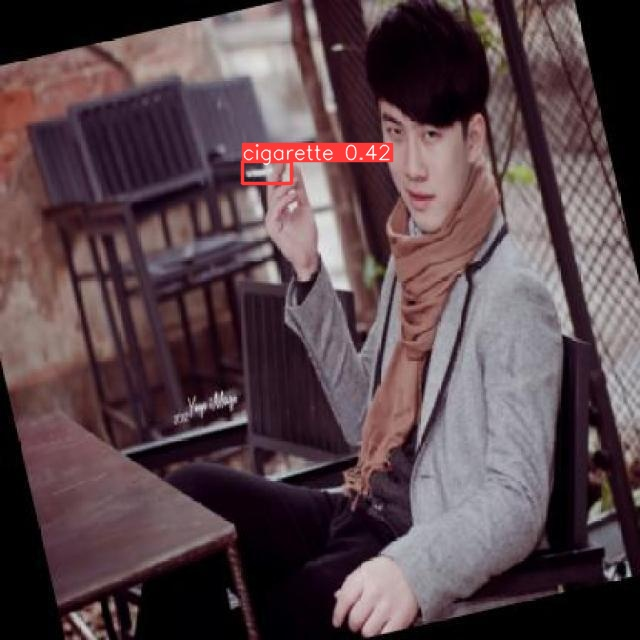

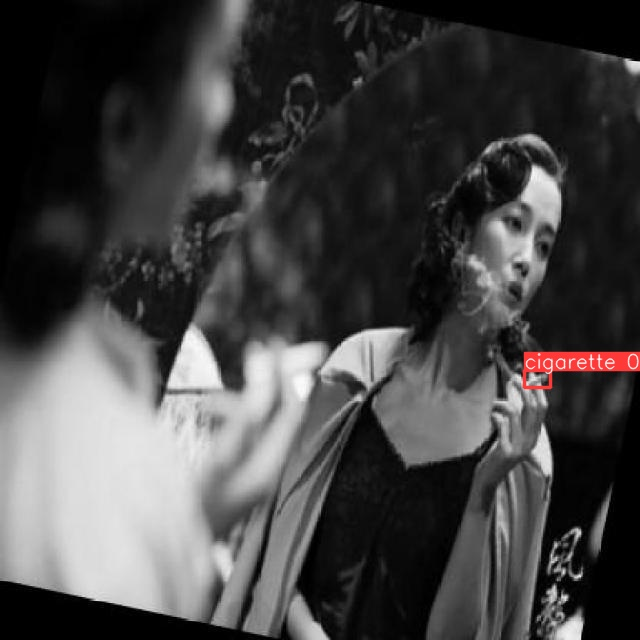

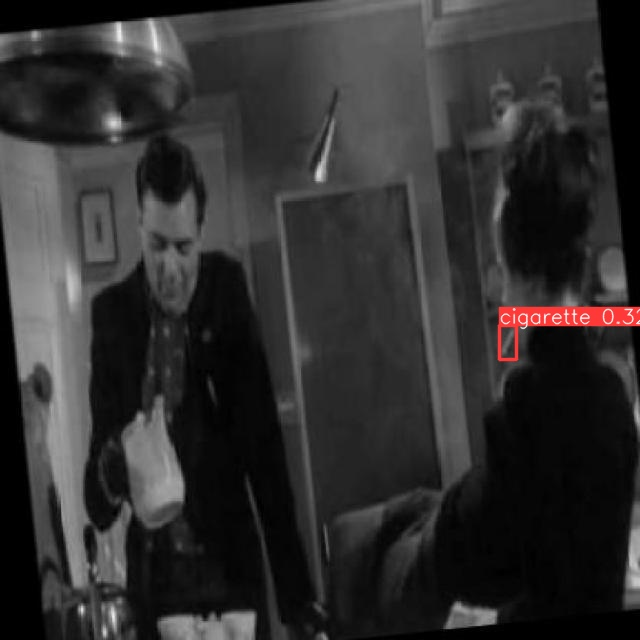

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict4/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="m6055gHUt9zXjkWKOxV1")
project = rf.workspace("three-musketeers").project("cigarette-detection-2ao2c")

project.version(3).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train4/")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.29, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/three-musketeers/cigarette-detection-2ao2c/3
Share your model with the world at: https://universe.roboflow.com/three-musketeers/cigarette-detection-2ao2c/model/3
